# Import Modeule

In [166]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns


# Loading DataSet

In [167]:
iris=pd.read_csv(r'C:\Users\91957\Desktop\inter\Iris.csv')

In [168]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [169]:
#there is no need of Id column so drop it
iris = iris.drop(columns=['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [170]:
# to show stats of data
iris.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [171]:
# information about datatype
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [172]:
# the number of smaples on each class 
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the DataSet

In [173]:
# checking for null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no null vaues in this DataSet

# Exploratory Data Analysis

<AxesSubplot:>

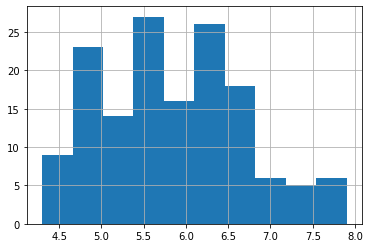

In [174]:
iris['SepalLengthCm'].hist()

<AxesSubplot:>

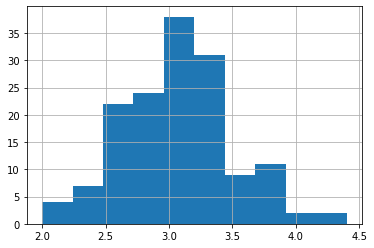

In [175]:
iris['SepalWidthCm'].hist()

<AxesSubplot:>

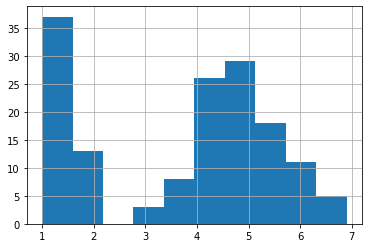

In [176]:
iris['PetalLengthCm'].hist()

<AxesSubplot:>

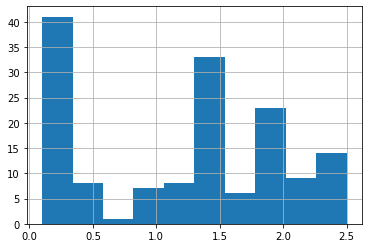

In [177]:
iris['PetalWidthCm'].hist()

<AxesSubplot:>

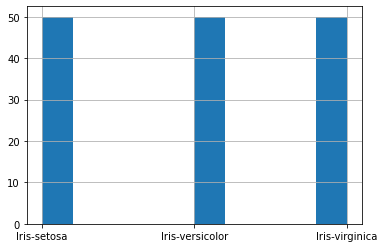

In [178]:
iris['Species'].hist()

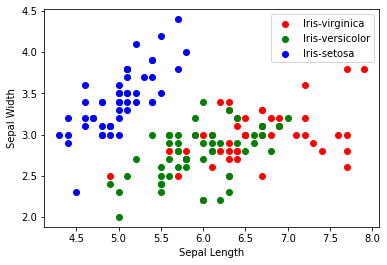

In [179]:
#scatter plot
col=['red','green','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']


for i in range(3):
    x=iris[iris['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=col[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

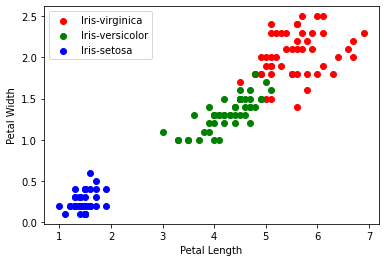

In [180]:
for i in range(3):
    x=iris[iris['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c=col[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

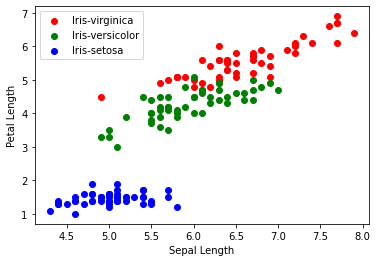

In [181]:
for i in range(3):
    x=iris[iris['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c=col[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

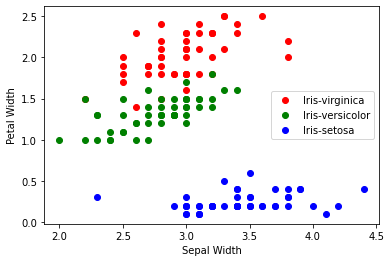

In [182]:
for i in range(3):
    x=iris[iris['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=col[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Correlation Matrix

In [183]:
#correlation between all columns to each other
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

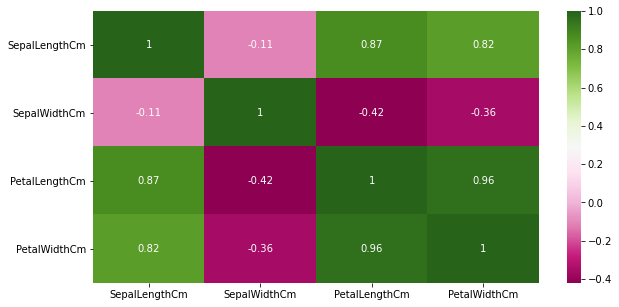

In [184]:
corr=iris.corr()
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(corr,annot=True, ax=ax, cmap='PiYG')

According to heatmap PetalWidthCm and PetalLengthCm is highly correlated so we can drop any one column.


# Label Encoder

In [185]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [186]:
iris['Species']=le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [187]:
iris['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

# Model Training

In [188]:
from sklearn.model_selection import train_test_split 
X=iris.drop(columns=['Species'])                                                       # independent
Y=iris['Species']                                                                      # dependent
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =0.3)

In [189]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [190]:
#model training
model.fit(x_train, y_train)

LogisticRegression()

In [191]:
#print metric to get performance
print("Accuracy : ",model.score(x_test, y_test)*100)

Accuracy :  100.0


In [192]:
#K-Nearest-Neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [193]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [194]:
#print metric to get performance
print("Accuracy : ",model.score(x_test, y_test)*100)

Accuracy :  100.0


In [195]:
#decision tree 
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [196]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [197]:
#print metric to get performance
print("Accuracy : ",model.score(x_test, y_test)*100)

Accuracy :  95.55555555555556
